# Regularisation

## Course : Probabilistic perspective of Machine Learning

Probabilistic model
Supervised learning: Likelihood (of the parameters): $P (D |w ) = P (Y |X ,w )P (X )$

### Maximum Likelihood Estimation

$$
\begin{aligned}
\underset{w}{\arg \max } P(\mathcal{D} \mid w) & =\underset{w}{\arg \max }\{P(Y \mid X, w) P(X)\} \\
& =\underset{w}{\arg \max } P(Y \mid X, w) \\
& =\underset{w}{\arg \max } P\left(y_1, \ldots y_N \mid x_1, \ldots, x_N, w\right) \\
& =\underset{w}{\arg \max } \prod_{i=1}^N P\left(y_i \mid x_i, w\right) \\
\end{aligned}
$$
$ys$ are i.i.d (some algebraic magic follows)
$$
\begin{aligned}
\underset{w}{\arg \max } P(\mathcal{D} \mid w) & =\underset{w}{\arg \max } \log \prod_{i=1}^N P\left(y_i \mid x_i, w\right) \\
& =\underset{w}{\arg \max } \sum_{i=1}^N \log P\left(y_i \mid x_i, w\right) \\
& =\arg \min _w \sum_{i=1}^N-\log P\left(y_i \mid x_i, w\right) \\
& =\arg \min _w \mathbb{E}_{(x, y) \sim \mathcal{D}}-\log P(y \mid x, w)
\end{aligned}
$$

* Assumption: samples are independent and indentically distributed.
* Assumption: distribution of x is uniform

### Example: logistic regression
Remember the likelihood for the logistic regression:
$$P(y = + |x ,w ) = θ(w^T x )$$
(θ is the logistic sigmoid)

Binary cross entropy error (for one sample point):
$$
\begin{cases}-\log \left(1-\theta\left(w^T x\right)\right) & \text { if } y=- \\ -\log \theta\left(w^T x\right) & \text { if } y=+\end{cases}
$$

Likelihood:
$$
P(y \mid x, w)=\mathcal{N}\left(y ; w^T x, \sigma^2\right)=\frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{\left(y-w^T x\right)^2}{2 \sigma^2}\right)
$$

Cross entropy error for linear regression:
$$
\begin{aligned}
\arg \min _w-\log P(y \mid x, w) & =\arg \min _w \frac{1}{2} \log \left(2 \pi \sigma^2\right)+\left(\frac{\left(y-w^T x\right)^2}{2 \sigma^2}\right) \\
& =\arg \min _w\left(y-w^T x\right)^2
\end{aligned}
$$
Looks familiar?

### Maximum A Posteriori Estimation
ML objective was:
$$
\underset{w}{\arg \max } P(\mathcal{D} \mid w)
$$
Alternative objective:
$$
\underset{w}{\arg \max } P(w \mid \mathcal{D})=\underset{w}{\arg \max } \frac{P(\mathcal{D} \mid w) P(w)}{P(\mathcal{D})}=\underset{w}{\arg \max } P(\mathcal{D} \mid w) P(w)
$$
Similar to before, but there is a prior:
incorporates prior knowledge

### Example: linear regression (Aside: Bayesian inference)
During training, calculate:
$$
P(w \mid \mathcal{D})=\frac{P(\mathcal{D} \mid w) P(w)}{P(\mathcal{D})}=\frac{P(\mathcal{D} \mid w) P(w)}{\int_{\mathbb{R}^d} P\left(\mathcal{D} \mid w^{\prime}\right) P\left(w^{\prime}\right) d w}
$$
The evidence is usually hard to calculate.
Inference (prediction) for a new sample point x':
$$
P\left(y \mid x^{\prime}\right)=\int_{\mathbb{R}^d} P\left(y \mid x^{\prime}, w\right) P(w \mid \mathcal{D}) d w
$$
It is not a point estimate:
it gives a distribution over possible parameter/prediction values

#### More details to better understand
During the training of a model, we often want to not only estimate the parameters $ w $ that best fit the training data $ \mathcal{D} $ but also to quantify our uncertainty about these parameters. Bayesian inference provides a principled framework for this by treating the parameters $ w $ as random variables with a prior distribution $ P(w) $.

In Bayesian inference, given the training data $ \mathcal{D} $, we update our beliefs about the parameters $ w $ using Bayes' theorem:

$$ P(w \mid \mathcal{D}) = \frac{P(\mathcal{D} \mid w) P(w)}{P(\mathcal{D})} $$

Here, $ P(w \mid \mathcal{D}) $ is the posterior distribution of the parameters given the data $ \mathcal{D} $, $ P(\mathcal{D} \mid w) $ is the likelihood of the data given the parameters, $ P(w) $ is the prior distribution of the parameters, and $ P(\mathcal{D}) $ is the evidence, which acts as a normalization constant.

The evidence $ P(\mathcal{D}) $ is usually difficult to calculate directly because it involves integrating over all possible parameter values:

$$ P(\mathcal{D}) = \int_{\mathbb{R}^d} P(\mathcal{D} \mid w^\prime) P(w^\prime) \, d w^\prime $$

Inference or prediction for a new sample point $ x^\prime $ involves integrating over all possible parameter values weighted by their posterior probabilities:

$$ P(y \mid x^\prime) = \int_{\mathbb{R}^d} P(y \mid x^\prime, w) P(w \mid \mathcal{D}) \, d w $$

This integral represents a weighted average of predictions made by different parameter values, reflecting the uncertainty in the parameters. Therefore, instead of giving a single point estimate, Bayesian inference provides a distribution over possible parameter and prediction values, allowing us to quantify our uncertainty about the predictions.

## Work-lab

1. Suppose that, in a linear regression task, we have (based on prior knowledge) a diagonal
Gaussian prior on the parameter vector $𝑤: 𝑤 ∼ 𝒩(0, 1/𝜆 𝐼)$ (where 𝐼 is the 𝑑-dimensional) identity matrix) for some hyperparameter 𝜆.
The target distribution is a Gaussian with deviance 𝜎 and mean 𝑓 (𝑥) (the target function); as in the slides.
Derive the error measure (loss function) using Maximum A Posteriori estimation! (Using
similar assumptions to when doing just Maximum Likelihood estimation.)
2. Repeat Exercises 1a-c from Lab 4 (last time), but use 𝐿2 regularisation with 𝜆 = 0.01. How did the plots and the errors change for the polynomials of different degrees?
3. (Problem 4.8 in the book) In the augmented error minimization with 𝜆 > 0, assume that 𝐸𝑖𝑛 is differentiable and use gradient descent to minimize 𝐸𝑎𝑢𝑔:
$$𝑤(𝑡 + 1) ← 𝑤(𝑡) − 𝜂∇𝐸𝑎𝑢𝑔(𝑤(𝑡))$$
Show that the update rule above is the same as
$$𝑤(𝑡 + 1) ← (1 − 2𝜂𝜆)𝑤(𝑡) − 𝜂∇𝐸𝑖𝑛(𝑤(𝑡))$$
Note: This is the origin of the name “weight decay” : 𝑤(𝑡) decays before being updated by
the gradient of 𝐸𝑖𝑛.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def extract_data(path, debug=False):
    data = np.load(path)
    if debug: print(data)
    X_train, X_test, Y_train, Y_test = data['X'], data['X_test'], data['Y'], data['Y_test']
    if debug:
        print("\nX_train:", X_train,
              "\nX_test:", X_test,
              "\nY_train:", Y_train,
              "\nY_test:", Y_test)
    return X_train, X_test, Y_train, Y_test

def polynomial_features(X, degree):
    return np.column_stack([X**i for i in range(degree + 1)])

def linear_regression(X, Y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return theta

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def plot_polynomials(X, y, X_test, y_test, degrees, thetas):
    plt.scatter(X, y, label='Training Data')
    plt.scatter(X_test, y_test, color='red', label='Test Data')
    
    x_values = np.linspace(-5, 5, 100)
    for degree, theta in zip(degrees, thetas):
        X_poly = polynomial_features(x_values, degree)
        y_values = X_poly.dot(theta)
        plt.plot(x_values, y_values, label=f'Degree {degree} Polynomial')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Polynomial Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
def linear_regression_regularized(X, y, lambda_reg):
    N, d = X.shape
    identity_matrix = np.eye(d)
    theta = np.linalg.inv(X.T.dot(X) + lambda_reg * identity_matrix).dot(X.T).dot(y)
    return theta

lambda_reg = 0.01

X_train, X_test, Y_train, Y_test = extract_data('../lab04-noise/ML.lab4.data/poly_s.npz')

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

degrees = [0, 1, 2, 5]
for degree in degrees:
    X_poly = polynomial_features(X_train, degree)
    theta = linear_regression_regularized(X_poly, Y_train, lambda_reg)
    Y_pred_train = X_poly.dot(theta)
    mse_train = mean_squared_error(Y_train, Y_pred_train)
    X_poly_test = polynomial_features(X_test, degree)
    Y_pred_test = X_poly_test.dot(theta)
    mse_test = mean_squared_error(Y_test, Y_pred_test)
    
    print(f"Degree {degree}:")
    print(f"  Training Mean Squared Error: {mse_train}")
    print(f"  Test Mean Squared Error: {mse_test}")

Degree 0:
  Training Mean Squared Error: 1951.7527221893376
  Test Mean Squared Error: 1159.9004984439691
Degree 1:
  Training Mean Squared Error: 1113.6141603620947
  Test Mean Squared Error: 1860.99726770461
Degree 2:
  Training Mean Squared Error: 4.266617864505075
  Test Mean Squared Error: 2.928628845018766
Degree 5:
  Training Mean Squared Error: 0.018803954214426655
  Test Mean Squared Error: 5188.012032132744


Degree 0:
  Training Mean Squared Error (poly_s): 1951.7527221893376
  Test Mean Squared Error (poly_s): 1159.9004984439691
Degree 1:
  Training Mean Squared Error (poly_s): 1113.6141603620947
  Test Mean Squared Error (poly_s): 1860.99726770461
Degree 2:
  Training Mean Squared Error (poly_s): 4.266617864505075
  Test Mean Squared Error (poly_s): 2.928628845018766
Degree 5:
  Training Mean Squared Error (poly_s): 0.018803954214426655
  Test Mean Squared Error (poly_s): 5188.012032132744
Degree 0:
  Training Mean Squared Error (poly_d): 802.0492141444555
  Test Mean Squared Error (poly_d): 1265.5442111608534
Degree 1:
  Training Mean Squared Error (poly_d): 707.7498452027722
  Test Mean Squared Error (poly_d): 1246.6205459332925
Degree 2:
  Training Mean Squared Error (poly_d): 0.6021366060245079
  Test Mean Squared Error (poly_d): 2.281619113318685
Degree 5:
  Training Mean Squared Error (poly_d): 0.00040889539847230696
  Test Mean Squared Error (poly_d): 12.316759601160038


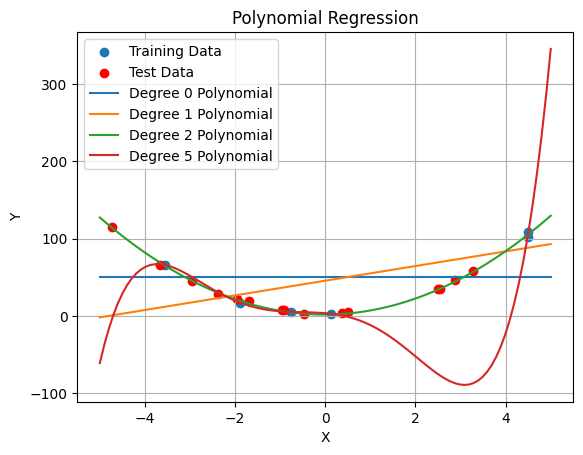

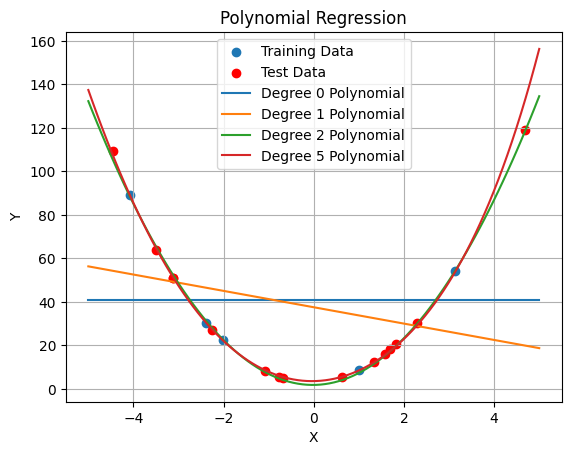

In [5]:
lambda_reg = 0.01

X_train, X_test, Y_train, Y_test = extract_data('../lab04-noise/ML.lab4.data/poly_s.npz')

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

degrees = [0, 1, 2, 5]
for degree in degrees:
    X_poly = polynomial_features(X_train, degree)
    theta = linear_regression_regularized(X_poly, Y_train, lambda_reg)
    Y_pred_train = X_poly.dot(theta)
    mse_train = mean_squared_error(Y_train, Y_pred_train)
    X_poly_test = polynomial_features(X_test, degree)
    Y_pred_test = X_poly_test.dot(theta)
    mse_test = mean_squared_error(Y_test, Y_pred_test)
    
    print(f"Degree {degree}:")
    print(f"  Training Mean Squared Error (poly_s): {mse_train}")
    print(f"  Test Mean Squared Error (poly_s): {mse_test}")

# Error calculation for poly_d dataset
X_train_d, X_test_d, Y_train_d, Y_test_d = extract_data('../lab04-noise/ML.lab4.data/poly_d.npz')
X_train_d = X_train_d.reshape(-1, 1)
X_test_d = X_test_d.reshape(-1, 1)

for degree in degrees:
    X_poly_d = polynomial_features(X_train_d, degree)
    theta_d = linear_regression_regularized(X_poly_d, Y_train_d, lambda_reg)
    Y_pred_train_d = X_poly_d.dot(theta_d)
    mse_train_d = mean_squared_error(Y_train_d, Y_pred_train_d)
    X_poly_test_d = polynomial_features(X_test_d, degree)
    Y_pred_test_d = X_poly_test_d.dot(theta_d)
    mse_test_d = mean_squared_error(Y_test_d, Y_pred_test_d)
    
    print(f"Degree {degree}:")
    print(f"  Training Mean Squared Error (poly_d): {mse_train_d}")
    print(f"  Test Mean Squared Error (poly_d): {mse_test_d}")

# Plotting for poly_s dataset
thetas_s = []
for degree in degrees:
    X_poly = polynomial_features(X_train, degree)
    theta = linear_regression_regularized(X_poly, Y_train, lambda_reg)
    thetas_s.append(theta)
plot_polynomials(X_train, Y_train, X_test, Y_test, degrees, thetas_s)

# Plotting for poly_d dataset
thetas_d = []
for degree in degrees:
    X_poly_d = polynomial_features(X_train_d, degree)
    theta_d = linear_regression_regularized(X_poly_d, Y_train_d, lambda_reg)
    thetas_d.append(theta_d)
plot_polynomials(X_train_d, Y_train_d, X_test_d, Y_test_d, degrees, thetas_d)

In [13]:
# Function to perform gradient descent using the first update rule
def gradient_descent_augmented_error(w, eta, gradient, lamb):
    return w - eta * (gradient + 2 * lamb * w)

# Function to perform gradient descent using the second update rule
def gradient_descent_weight_decay(w, eta, gradient, lamb):
    return (1 - 2 * eta * lamb) * w - eta * gradient

# Let's define some example values
w = np.array([1, 2, 3])  # Initial weights
eta = 0.1  # Learning rate
gradient = np.array([0.1, -0.2, 0.3])  # Gradient
lamb = 0.01  # Lambda value

# Perform gradient descent using the first update rule
w_updated_augmented_error = gradient_descent_augmented_error(w, eta, gradient, lamb)

# Perform gradient descent using the second update rule
w_updated_weight_decay = gradient_descent_weight_decay(w, eta, gradient, lamb)

print("Updated weights using first update rule:", w_updated_augmented_error)
print("Updated weights using second update rule:", w_updated_weight_decay)

Updated weights using first update rule: [1.05 2.14 3.15]
Updated weights using second update rule: [1.05 2.14 3.15]


### Question 3 - show that the update rule using gradient descent to minimize the augmented error is equivalent to the update rule incorporating weight decay

Let's denote the augmented error as $ E_{aug} $ and the regularized error as $ E_{reg} $. The augmented error is given by:

$$E_{aug} = E_{in} + \lambda ||w||^2$$

where $ \lambda $ is the regularization parameter and $ ||w||^2 $ represents the squared norm of the weight vector $ w $.

Now, let's compute the gradient of the augmented error $ \nabla E_{aug} $:

$$\nabla E_{aug} = \nabla (E_{in} + \lambda ||w||^2)$$
$$= \nabla E_{in} + \nabla (\lambda ||w||^2)$$
$$= \nabla E_{in} + 2 \lambda w$$

The gradient descent update rule is:

$$w(t + 1) = w(t) - \eta \nabla E_{aug}(w(t))$$

Substituting the expression for $ \nabla E_{aug} $, we get:

$$w(t + 1) = w(t) - \eta (\nabla E_{in} + 2 \lambda w(t))$$

Expanding this expression:

$$w(t + 1) = w(t) - \eta \nabla E_{in} - 2 \eta \lambda w(t)$$

Now, let's rewrite this update rule by factoring out $ (1 - 2 \eta \lambda) $ from the $ w(t) $ term:

$$w(t + 1) = (1 - 2 \eta \lambda) w(t) - \eta \nabla E_{in}(w(t))$$

This update rule is equivalent to the update rule:

$$w(t + 1) = (1 - 2 \eta \lambda) w(t) - \eta \nabla E_{in}(w(t))$$

This demonstrates that the update rule obtained through gradient descent to minimize the augmented error is the same as the update rule incorporating weight decay. The weight $ w(t) $ decays by a factor of $ (1 - 2 \eta \lambda) $ before being updated by the gradient of the in-sample error $ E_{in} $.